In [2]:
import pandas as pd
import numpy as np
import json
import os

pd.set_option("display.max_columns",0)

In [3]:
TA_REVIEW_DATA_PATH = os.path.join("..","..","data","TA_User_Reviws_Korea_all.json")
df = pd.read_json(TA_REVIEW_DATA_PATH )

In [5]:
df.head(5)

,id,language,reviewStatus,title,helpfulVotes,createdDate,publishedDate,rating,text,photoIds,...,location.thumbnail,route,location.route,userProfile.route,location.reviewSummary,location.parent,userProfile.hometown.location.parent,userProfile.contributionCounts,location,userProfile.avatar
0,748454819,en,PUBLISHED,Great Hotel,0,2020-03-01,2020-03-01,5,I really enjoyed our stay here in Gracery Hote...,[453807126],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,744980685,en,PUBLISHED,Vibrant and Trendy,0,2020-02-14,2020-02-13,5,This is a place for you to laidback and have s...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,744978150,en,PUBLISHED,So Yummy!,0,2020-02-14,2020-02-13,4,The chicken was so delicious. its crisp and cr...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,744977340,en,PUBLISHED,Super Luv,0,2020-02-14,2020-02-13,5,"First, the location. Its located just right be...",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,744973034,en,PUBLISHED,Chaotic Street Food,0,2020-02-14,2020-02-13,4,This is the place where you can shop any cosme...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['location.placeType'].value_counts()

ACCOMMODATION    14421
EATERY           12118
ATTRACTION       10540
ACTIVITY           117
CITY                 1
Name: location.placeType, dtype: int64

In [7]:
df[df['location.placeType'] == "EATERY"]['location.additionalNames.long'].value_counts()

Myeongdong Kyoja Main, South Korea                        166
Tosokchon Samgyetang, South Korea                         126
Yoogane Myeongdong 1st Store, South Korea                  37
Isaac Toast Myeongdong, South Korea                        37
Sinseon Seolleongtang Myeongdong, South Korea              31
                                                         ... 
Guryongpo Gyejeol Hoejib, South Korea                       1
Seongsu Kalguksu, South Korea                               1
Starbucks Jinju Gyeongsang National Univ., South Korea      1
Yugane Dakgalbi Cheonho, South Korea                        1
Hyeongje Yukheo, South Korea                                1
Name: location.additionalNames.long, Length: 7066, dtype: int64

## 2차 데이터 추가 

In [4]:
DATA_PATH = lambda x: os.path.join("..","..","data",x)

In [5]:
df_hotel = pd.read_json(DATA_PATH("TA_Hotel_Reviews.json"))
df_eat = pd.read_json(DATA_PATH("TA_Seoul_Eatery_Reviews.json"))

In [6]:
df = pd.concat([df_hotel, df_eat])
df = df.reset_index(drop=True)

/Users/josang-yeon/.pyenv/versions/3.7.4/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
df.shape

(146241, 100)

In [8]:
df.userId.nunique()

80938

In [9]:
df.userId

0         E44FFBC7D1E0A97FECCCF7F8EB052E0C
1         F9AD0C1F6409A1574AD0AFC237D2A4CE
2         770775D59B126E71D38D56FAB9B95F93
3         4F1BF9403CA4EB27756E0C824A088553
4         23EF5413495FF530151DB7E5C0FEF38D
                        ...               
146236    0B7BE2A2FF1D77166D16CB9A45456E81
146237    FFB61B1A83604683BDBFF68D444F304C
146238    F600275BB00786554F35A0D215C694B1
146239    F8C18CF58CAFC4867BB515FFB663D878
146240    2D2CA6B04125BB62D1BB1FD7B27D8A5F
Name: userId, Length: 146241, dtype: object

In [10]:
df.groupby(["userId","location.placeType"]).size().unstack(-1)

location.placeType,ACCOMMODATION,EATERY
userId,,
0001422DDBC8371F0D5638A54A67B49E,1.0,NaN
0001DF001B6F7F9B9B5382CC2E820F3D,1.0,NaN
0002941EB80B8D62C497FCFE89FE5FE5,1.0,NaN
0002C7C9BF0686DB770487FD63B5C6F5,NaN,10.0
000347839C2E555CE5DDEA19BE2F0572,NaN,1.0
...,...,...
FFFAC8BEDEB2688CED0FFBB720B579EC,1.0,NaN
FFFB8DA80DB5D74BFB28A8C581007477,NaN,2.0
FFFBD5D5AB0E4CE360D46669493AD16B,NaN,2.0


In [11]:
df_pivot = df.pivot_table('id', "userId","location.placeType", aggfunc="count", margins=True)

In [12]:
df_pivot.sort_values("All", ascending=False)

location.placeType,ACCOMMODATION,EATERY,All
userId,,,
All,63634.0,81645.0,145279
E5F93B0B3B8683B98A7B3642B2BE2399,3.0,1516.0,1519
C336D83530ADBB29B9171F14C58354F0,4.0,478.0,482
3C5338715DDDD2A65EF9C9EA389B0B9D,1.0,475.0,476
90076979BB69F17E1745E30F1A2153B2,9.0,366.0,375
...,...,...,...
5EF6D6EF31C67400982F030FEA89E591,NaN,1.0,1
5EF76EF1B10BD639F6C2F2A15BB34B95,1.0,NaN,1
5EF79BD69C90F4267A911186FB76C2E4,1.0,NaN,1


### 호텔, 식당 모두 리뷰를 남긴 사람들의 리뷰수 분포도

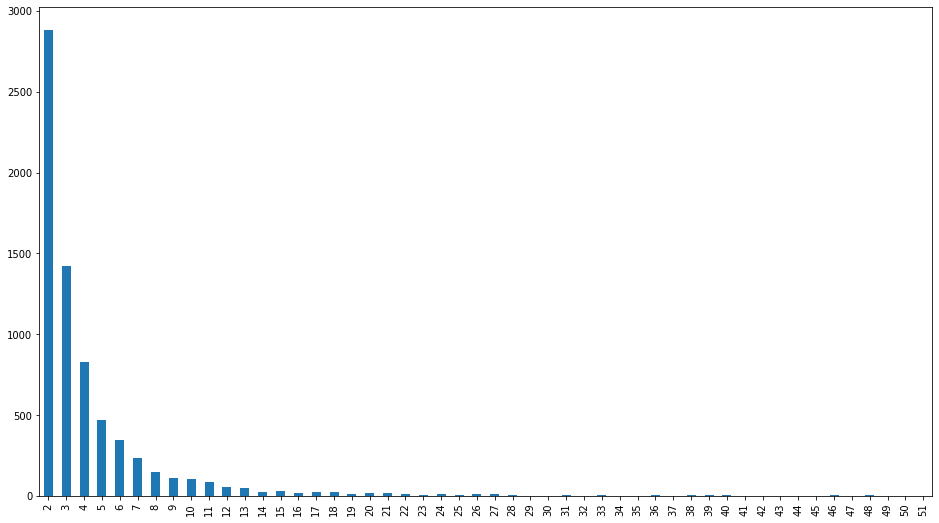

In [32]:
df_pivot.sort_values("All", ascending=False).dropna()["All"][1:].value_counts().sort_index()[:50].plot.bar(figsize=(16,9))

In [18]:
# df["userId"].hist()

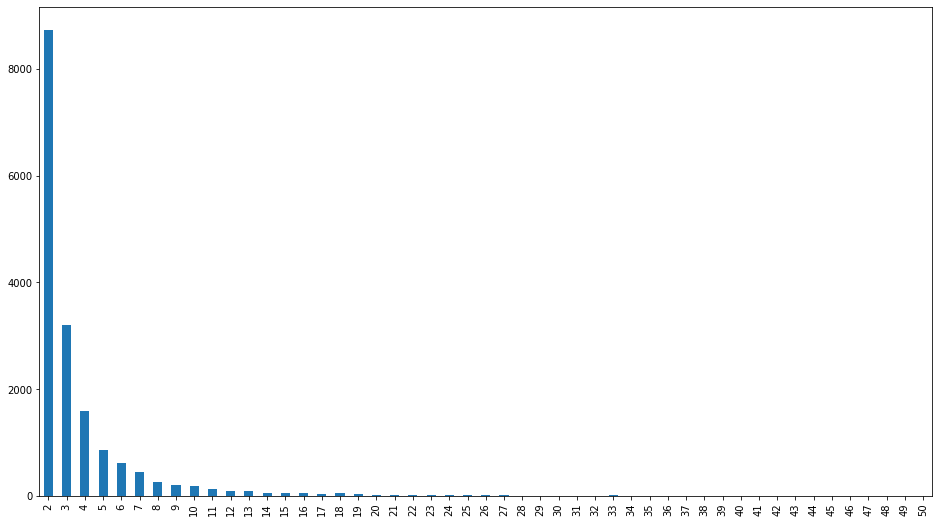

In [21]:
df["userId"].value_counts().reset_index()['userId'].value_counts().sort_index()[1:50].plot.bar(figsize=(16,9))